In [300]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.model_selection import GridSearchCV
import warnings
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("E:/4.dataset_150.csv")
X=df.iloc[:,:18]
y=df['output_grade']
y=y.values.ravel()
scaler = MinMaxScaler(feature_range=(0, 1))
x= scaler.fit_transform(X)
# prepare the cross-validation procedure
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=41)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
warnings.filterwarnings('ignore')
# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'sag','saga'],
    'max_iter': [100,200,300,500,1000,1500,10000]
}



logreg = LogisticRegression(multi_class='multinomial')
clf = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=5)                     # number of folds



clf.fit(x_train,y_train)


print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)


Tuned Hyperparameters : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.9110671936758894


In [ ]:
#Tuned Hyperparameters : {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
#Accuracy : 0.9102766798418973

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial', C=0.1, max_iter=100, penalty='l2',solver='newton-cg')


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, 
                                                    test_size=0.30)
print(model.fit(x_train,y_train))

LogisticRegression(C=0.1, multi_class='multinomial', solver='newton-cg')


In [39]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)#3very imp

0.7333333333333333

In [40]:
model.score(x_test,y_test) #accuracy

0.7333333333333333

In [41]:
#model.predict_proba(x_test)

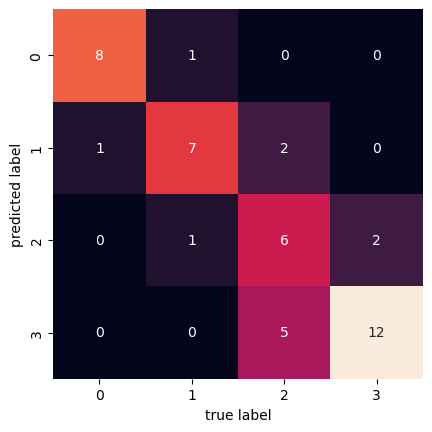

In [42]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.70      0.78      0.74         9
           3       0.67      0.46      0.55        13
           4       0.71      0.86      0.77        14

    accuracy                           0.73        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.73      0.73      0.72        45



In [44]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# prepare the cross-validation procedure
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (100*mean(scores), 100*std(scores)))

Accuracy: 69.782 (10.601)


In [46]:
#Test Accuracy
model.fit(x_train, y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89         9
           2       0.70      0.78      0.74         9
           3       0.67      0.46      0.55        13
           4       0.71      0.86      0.77        14

    accuracy                           0.73        45
   macro avg       0.74      0.75      0.74        45
weighted avg       0.73      0.73      0.72        45



In [50]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

def cross_validation(model,x,y, cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_score': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
           # 'loss': make_scorer('neg_log_loss')
        }  
               
            
    
    
    
    results = cross_validate(model, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_score'],
             "Validation F1 scores": results['test_f1_score'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_score'].mean(),
              "Mean Validation F1 Score": results['test_f1_score'].mean()
                      }


result = cross_validation(model, x_train,y_train, 5)
print(result)


{'Training Accuracy scores': array([0.77108434, 0.74698795, 0.75903614, 0.74698795, 0.79761905]), 'Validation Accuracy scores': array([0.71428571, 0.80952381, 0.80952381, 0.85714286, 0.75      ]), 'Training Precision scores': array([0.78441877, 0.75473699, 0.75917339, 0.77318776, 0.80530303]), 'Validation Precision scores': array([0.76785714, 0.825     , 0.875     , 0.88095238, 0.77291667]), 'Training Recall scores': array([0.7640419 , 0.74230277, 0.75083404, 0.74902245, 0.79513889]), 'Validation Recall scores': array([0.72083333, 0.80416667, 0.83333333, 0.8125    , 0.75833333]), 'Training F1 scores': array([0.75950802, 0.73048048, 0.74472679, 0.73465918, 0.78626407]), 'Validation F1 scores': array([0.69345238, 0.80178571, 0.80310458, 0.78076923, 0.74801587]), 'Mean Training Accuracy': 76.43430866322433, 'Mean Validation Accuracy': 78.80952380952381, 'Mean Training Precision': 0.7753639871618999, 'Mean Validation Precision': 0.8243452380952381, 'Mean Training Recall': 0.760268012110083

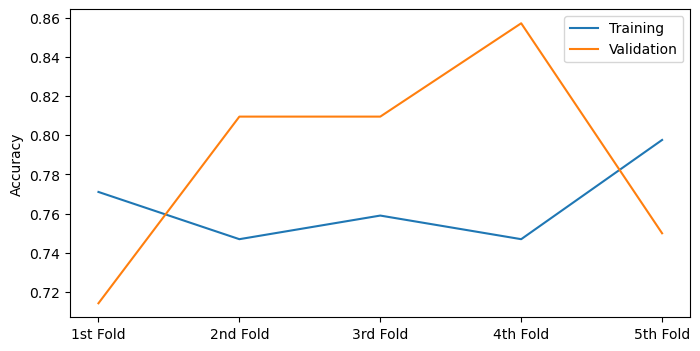

In [52]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.plot(result["Training Accuracy scores"])
plt.plot(result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()



        
      
 
    
    
    
    
    
    

Tuned Hyperparameters : {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Accuracy : 0.7644268774703559


In [311]:
#y_pred=clf.predict(x_test)
#print(classification_report(y_test,y_pred))